In [5]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 9CEC-921D

 Directory of d:\ML\Google colab\stock all

04/08/2024  11:18 PM    <DIR>          .
04/08/2024  12:05 PM    <DIR>          ..
04/05/2024  11:17 AM            21,039 bank.csv
04/08/2024  11:04 PM             5,609 LR.csv
04/08/2024  11:17 PM             5,744 Lstm.csv
04/08/2024  11:00 PM            66,246 stock.ipynb
04/08/2024  11:18 PM             1,868 test.ipynb
               5 File(s)        100,506 bytes
               2 Dir(s)  119,931,023,360 bytes free


In [7]:
import psycopg2
import pandas as pd

# Database connection details
username = 'test'
password = 'test123'
hostname = '192.168.1.141'
port = '5432'
database_name = 'mydb'

# Establish connection
conn = psycopg2.connect(
    dbname=database_name,
    user=username,
    password=password,
    host=hostname,
    port=port
)

# SQL query
sql_query = "SELECT  TO_TIMESTAMP(lasttradetime) AT TIME ZONE 'Asia/Kolkata' AS lasttradetime, open,high,low,close,openinterest FROM whole_indices_futures WHERE instrumentidentifier = 'NIFTY10APR2422700CE' order by lasttradetime;"

# Execute SQL query
cursor = conn.cursor()
cursor.execute(sql_query)

# Fetch all the results
rows = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
conn.close()

# Display the DataFrame
print(df)


            lasttradetime    open    high     low   close  openinterest
0     2024-03-13 11:13:00  212.50  212.50  212.50  212.50             0
1     2024-03-13 11:13:00  212.50  212.50  212.50  212.50             0
2     2024-03-13 11:14:00  212.50  212.50  212.50  212.50             0
3     2024-03-13 11:14:00  212.50  212.50  212.50  212.50             0
4     2024-03-13 11:15:00  212.50  212.50  212.50  212.50             0
...                   ...     ...     ...     ...     ...           ...
13017 2024-04-09 15:28:00   41.85   42.80   41.80   41.80       8715150
13018 2024-04-09 15:29:00   41.85   41.95   40.00   40.00       8715150
13019 2024-04-09 15:29:00   41.85   41.95   40.00   40.00       8715150
13020 2024-04-09 15:30:00   40.00   40.00   40.00   40.00       8715150
13021 2024-04-09 15:30:00   40.00   40.00   40.00   40.00       8715150

[13022 rows x 6 columns]


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

df.set_index('lasttradetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 10
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=200))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data


C:\Users\santh\AppData\Local\Temp\ipykernel_17676\1493518390.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0048 - val_loss: 5.1682e-04
Epoch 2/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 2.3014e-04 - val_loss: 5.4106e-04
Epoch 3/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 2.7696e-04 - val_loss: 0.0018
Epoch 4/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 2.5178e-04 - val_loss: 8.9183e-04
Epoch 5/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 1.2662e-04 - val_loss: 7.1916e-04
Epoch 6/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 9.8843e-05 - val_loss: 8.2155e-04
Epoch 7/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 9.2450e-05 - val_loss: 5.5248e-04
Epoch 8/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 8.6138e-05 - val_loss: 5.9280e-04
Epoch 9/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 8.2076e-05 - val_loss: 6.0093e-04
Epoch 10/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 5.6378e-05 - val_loss: 9.5980e-04
Epoch 11/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - 

,open,high,low,close,tradedqty
0,40.624107,41.503784,39.862942,41.043938,2003056.875
1,40.400696,41.483215,40.153431,41.530018,2005363.250
2,41.235394,42.050133,40.428413,41.564827,2005406.375
3,41.555710,42.269432,40.532108,41.541615,2006623.500
4,41.166897,42.028614,40.324486,41.494068,2007047.750
...,...,...,...,...,...
2598,38.649258,36.173943,42.021793,39.750969,8282024.000
2599,37.594627,35.790787,42.200855,40.660866,8129234.500
2600,40.543591,38.041382,43.233467,40.951260,8030971.500
2601,37.809170,35.488876,40.675945,38.612843,7959831.500


In [4]:
frequency = 'T'
start_time = '2024-04-02 10:49:00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('lLstmm.csv')
data

C:\Users\santh\AppData\Local\Temp\ipykernel_17676\3972573118.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


,open,high,low,close,tradedqty
lasttradetime,,,,,
2024-04-02 10:49:00,40.624107,41.503784,39.862942,41.043938,2003056.875
2024-04-02 10:50:00,40.400696,41.483215,40.153431,41.530018,2005363.250
2024-04-02 10:51:00,41.235394,42.050133,40.428413,41.564827,2005406.375
2024-04-02 10:52:00,41.555710,42.269432,40.532108,41.541615,2006623.500
2024-04-02 10:53:00,41.166897,42.028614,40.324486,41.494068,2007047.750
...,...,...,...,...,...
2024-04-04 06:07:00,38.649258,36.173943,42.021793,39.750969,8282024.000
2024-04-04 06:08:00,37.594627,35.790787,42.200855,40.660866,8129234.500
2024-04-04 06:09:00,40.543591,38.041382,43.233467,40.951260,8030971.500


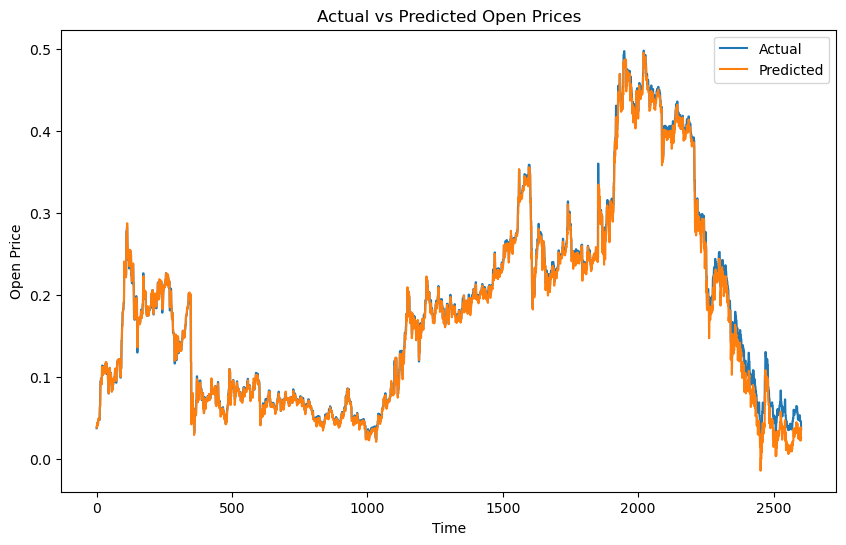

Root Mean Squared Error (RMSE): 0.025818108838978508
Mean Absolute Percentage Error (MAPE): 6.926015502652147


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Visualize the predicted data
plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title('Actual vs Predicted Open Prices')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)



In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

df.set_index('lasttradetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 2
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=200))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data


C:\Users\santh\AppData\Local\Temp\ipykernel_17676\3105200834.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0103 - val_loss: 1.8663e-04
Epoch 2/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.8757e-05 - val_loss: 2.3067e-04
Epoch 3/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.6377e-05 - val_loss: 1.9413e-04
Epoch 4/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.4937e-05 - val_loss: 2.5547e-04
Epoch 5/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.8877e-05 - val_loss: 2.7525e-04
Epoch 6/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0459e-04 - val_loss: 1.4810e-04
Epoch 7/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.0608e-05 - val_loss: 2.1175e-04
Epoch 8/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0266e-04 - val_loss: 1.7123e-04
Epoch 9/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.3043e-05 - val_loss: 3.7787e-04
Epoch 10/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.7129e-05 - val_loss: 3.0652e-04
Epoch 11/50
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.

,open,high,low,close,tradedqty
0,39.875130,41.191139,38.583500,39.986801,2003202.125
1,39.979076,41.284000,38.545586,39.944180,2003279.250
2,40.083271,41.718929,38.855545,40.526218,2005617.375
3,40.474476,41.915894,39.047001,40.574554,2008688.625
4,40.688461,42.199799,38.974670,40.554592,2009858.000
...,...,...,...,...,...
2599,45.561756,42.387787,39.681591,38.824875,8470157.000
2600,45.033913,41.687683,39.257191,38.148273,8310577.500
2601,45.191444,42.701466,39.816956,39.371117,8007957.500
2602,44.841736,41.719387,38.513268,37.604908,8011147.000
